Create function that:
    takes genbank accession as input
    determines length distributions of ALL CDS in that genome
    uses quantile segmentation to create short and long CDS
    calculate the GC content for short and long
    test whether they are statistically significant
    create plots of CDS length distribution histogram
    create boxplot of GC content for short and long groups
    Print out mean, min and max of CDS lengths and quantile thresholds for long and short groups

In [33]:
from Bio import SeqIO
from Bio import Entrez

def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())   

#First stage of the function, write the accession number as a genbank file for later parsing        
        
analyse_genbank_gc(["NC_000883"])

In [32]:
%%bash
head -10 NC_000883.gb
#Verified that the file does in fact exist

LOCUS       NC_000883               5596 bp ss-DNA     linear   VRL 13-AUG-2018
DEFINITION  Human parvovirus B19, complete genome.
ACCESSION   NC_000883
VERSION     NC_000883.2
DBLINK      BioProject: PRJNA485481
KEYWORDS    RefSeq.
SOURCE      Human parvovirus B19
  ORGANISM  Human parvovirus B19
            Viruses; Monodnaviria; Shotokuvirae; Cossaviricota;
            Quintoviricetes; Piccovirales; Parvoviridae; Parvovirinae;


In [43]:
from Bio import SeqIO
from Bio import Entrez

def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    for accession in accession_list:
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                print(f"{feature_count} CDS regions detected in {accession}")
                

analyse_genbank_gc(["NC_000883"])

#Parses the resulting .gb files and tells us how many CDS regions are in a given accesion number
#Will be the basis for the function moving on

6 CDS regions detected in NC_000883


In [56]:
accessions = []
with open('genbank_accessions.txt','r') as in_file:
    for line in in_file:
        string = line.strip()
        accessions.append(string)

print(accessions)

#Now let's have a look

['JN258408', 'JF801956', 'NC_014649', 'JN036606', 'NC_014637', 'U00096']


In [57]:
from Bio import SeqIO
from Bio import Entrez

# analyse_genbank_gc(accessions)

#Oh Dear

1120 CDS regions detected in JN258408
988 CDS regions detected in JF801956
979 CDS regions detected in NC_014649
756 CDS regions detected in JN036606
544 CDS regions detected in NC_014637
4315 CDS regions detected in U00096


In [72]:
#moving on

from Bio import SeqIO
from Bio import Entrez

def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    
    
    
    for accession in accession_list:
        coding_lens = []
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                        coding_lens.append(len(feature))
                print(coding_lens)
                print(f"{feature_count} CDS regions detected in {accession}")
                

analyse_genbank_gc(["NC_000883"])

[2016, 225, 2346, 246, 1665, 285]
6 CDS regions detected in NC_000883


In [109]:

import numpy as np
from Bio import SeqIO
from Bio import Entrez

def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    
    
    
    for accession in accession_list:
        coding_lens = []
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                        coding_lens.append(len(feature))
                print(coding_lens)
                print(f"{feature_count} CDS regions detected in {accession}")
                accession_10 = np.quantile(coding_lens, .10)
                accession_90 = np.quantile(coding_lens, .90)
                #saves quartiles as a variable
                
                print("Quantile boundaries")
                print(f"10%: {accession_10}")
                print(f"90%: {accession_90}")
                #prints it 
                
                smallquart = []
                bigquart = []
                for feature in rec.features:
                    if feature.type == "CDS":
                        if len(feature) <= accession_10:
                                smallquart.append(feature)
                        
                        elif len(feature) >= accession_90:
                                bigquart.append(feature)
                        
                print(len(smallquart))
                print(len(bigquart))

                #Filters high and low quartile ranges into two new lists
                
analyse_genbank_gc(["NC_000883"])

[2016, 225, 2346, 246, 1665, 285]
6 CDS regions detected in NC_000883
Quantile boundaries
10%: 235.5
90%: 2181.0
1
1


In [4]:
from Bio import SeqIO
from Bio import Entrez
from Bio.SeqUtils import GC
import numpy as np


def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    
    
    
    for accession in accession_list:
        coding_lens = []
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                        coding_lens.append(len(feature))
                print(f"{feature_count} CDS regions detected in {accession}")
                print("")
                accession_10 = np.quantile(coding_lens, .10)
                accession_90 = np.quantile(coding_lens, .90)
                #saves quartiles as a variable
                

                
                smallquart = []
                bigquart = []
                for feature in rec.features:
                    if feature.type == "CDS":
                        if len(feature) <= accession_10:
                                smallquart.append(feature.location.extract(rec).seq)
                        
                        elif len(feature) >= accession_90:
                                bigquart.append(feature.location.extract(rec).seq)
                total = 0        
                for quart in smallquart:
                    total += GC(quart)
                    total / len(smallquart)
                    smallGC = total
                    
                
                total = 0        
                for quart in bigquart:
                    total += GC(quart)
                    total / len(bigquart)
                    bigGC = total
                
                
                print("Quantile boundaries & GC Content")
                print(f"10%: {accession_10}, GC Content {smallGC}%")
                print(f"90%: {accession_90}, GC Content {bigGC}%")
                #Calculates average GC content

                
                
analyse_genbank_gc(["NC_000883"])

6 CDS regions detected in NC_000883

Quantile boundaries & GC Content
10%: 235.5, GC Content 53.77777777777778%
90%: 2181.0, GC Content 42.028985507246375%


6 CDS regions detected in NC_000883

Quantile boundaries & GC Content
10%: 235.5
Mean (GC%) in short seqs 53.77777777777778
Variance (GC%) in short seqs 0.0

90%: 2181.0
Mean (GC%) in long seqs 42.028985507246375
Variance (GC%) in long seqs 0.0


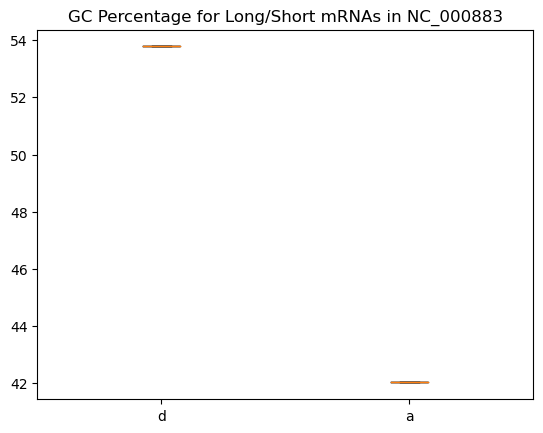

In [29]:
from Bio import SeqIO
from Bio import Entrez
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings


def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    
    
    
    for accession in accession_list:
        coding_lens = []
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                        coding_lens.append(len(feature))
                print(f"{feature_count} CDS regions detected in {accession}")
                print("")
                accession_10 = np.quantile(coding_lens, .10)
                accession_90 = np.quantile(coding_lens, .90)
                #saves quartiles as a variable
                

                
                smallquart = []
                bigquart = []
                for feature in rec.features:
                    if feature.type == "CDS":
                        if len(feature) <= accession_10:
                                smallquart.append(feature.location.extract(rec).seq)
                        
                        elif len(feature) >= accession_90:
                                bigquart.append(feature.location.extract(rec).seq)
                total = 0        
                for quart in smallquart:
                    total += GC(quart)
                    total / len(smallquart)
                    smallGC = total
                    
                
                total = 0        
                for quart in bigquart:
                    total += GC(quart)
                    total / len(bigquart)
                    bigGC = total
                
                
                long_seq_gc = []
                for sequence in bigquart:
                    long_seq_gc.append(GC(sequence))
                short_seq_gc = []
                for sequence in smallquart:
                    short_seq_gc.append(GC(sequence))
                
                
                
                print("Quantile boundaries & GC Content")
                print(f"10%: {accession_10}")
                print("Mean (GC%) in short seqs",np.mean(short_seq_gc))
                print("Variance (GC%) in short seqs",np.var(short_seq_gc))
                print("")
                print(f"90%: {accession_90}")
                print("Mean (GC%) in long seqs",np.mean(long_seq_gc))
                print("Variance (GC%) in long seqs",np.var(long_seq_gc))
                
                
                data = [short_seq_gc,long_seq_gc]
                data_names = ['Short', 'Long']
             
                fig1, ax1 = plt.subplots()
                ax1.set_xticklabels('data_names', fontsize=10)
                ax1.set_title(f'GC Percentage for Long/Short mRNAs in {accession}')
                ax1.boxplot(data)
                warnings.filterwarnings("ignore")
                plt.show()
                print("")
                print("")
                
analyse_genbank_gc(["NC_000883"])


#A little box plot experimentation

6 CDS regions detected in NC_000883

Quantile boundaries & GC Content
10%: 235.5
Mean (GC%) in short seqs 53.77777777777778
Variance (GC%) in short seqs 0.0

90%: 2181.0
Mean (GC%) in long seqs 42.028985507246375
Variance (GC%) in long seqs 0.0

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  nan

Maximum CDS length: 2346
Minimum CDS length: 225
Mean CDS length: 1130.5


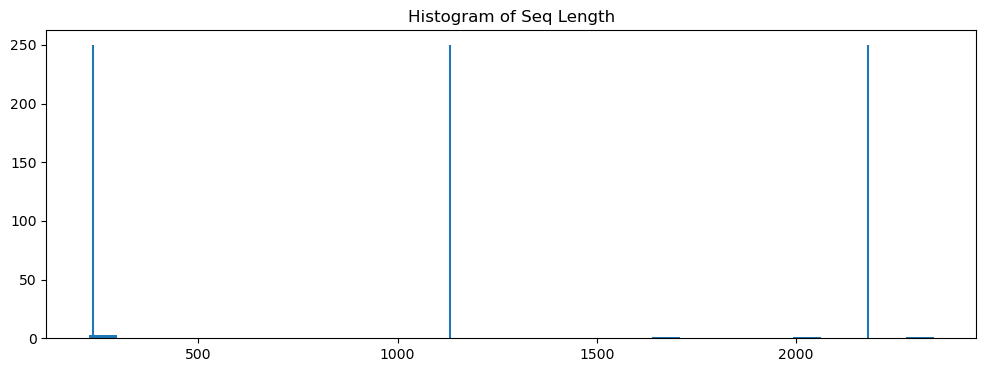

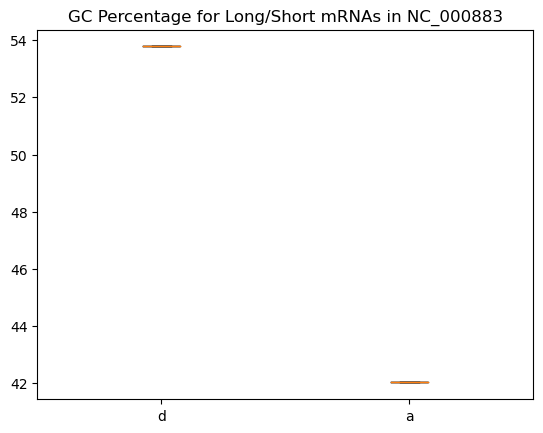

In [64]:
from Bio import SeqIO
from Bio import Entrez
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings


def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    
    
    
    for accession in accession_list:
        coding_lens = []
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                        coding_lens.append(len(feature))
                print(f"{feature_count} CDS regions detected in {accession}")
                print("")
                accession_10 = np.quantile(coding_lens, .10)
                accession_90 = np.quantile(coding_lens, .90)
                #saves quartiles as a variable
                

                
                smallquart = []
                bigquart = []
                for feature in rec.features:
                    if feature.type == "CDS":
                        if len(feature) <= accession_10:
                                smallquart.append(feature.location.extract(rec).seq)
                        
                        elif len(feature) >= accession_90:
                                bigquart.append(feature.location.extract(rec).seq)
                total = 0        
                for quart in smallquart:
                    total += GC(quart)
                    total / len(smallquart)
                    smallGC = total
                    
                
                total = 0        
                for quart in bigquart:
                    total += GC(quart)
                    total / len(bigquart)
                    bigGC = total
                
                
                long_seq_gc = []
                for sequence in bigquart:
                    long_seq_gc.append(GC(sequence))
                short_seq_gc = []
                for sequence in smallquart:
                    short_seq_gc.append(GC(sequence))
                
                
                
                print("Quantile boundaries & GC Content")
                print(f"10%: {accession_10}")
                print("Mean (GC%) in short seqs",np.mean(short_seq_gc))
                print("Variance (GC%) in short seqs",np.var(short_seq_gc))
                print("")
                print(f"90%: {accession_90}")
                print("Mean (GC%) in long seqs",np.mean(long_seq_gc))
                print("Variance (GC%) in long seqs",np.var(long_seq_gc))
                
                



                tst = stats.ttest_ind(short_seq_gc,long_seq_gc, equal_var=False)
                print("")
                print ('T test to determine if long & short GC% are drawn from the same distribution')
                print ('Note: unequal variances')
                print ('pvalue: ',tst.pvalue)
                print('')
                print(f'Maximum CDS length: {max(coding_lens)}')
                print(f'Minimum CDS length: {min(coding_lens)}')
                print(f'Mean CDS length: {np.mean(coding_lens)}')
                
                
                fig, axes = plt.subplots(figsize=(12,4))
                axes.hist(coding_lens, bins=30)
                axes.set_title('Histogram of Seq Length')
                axes.vlines(accession_10,0,250)
                axes.vlines(accession_90,0,250)
                axes.vlines(np.mean(coding_lens),0,250)
                warnings.filterwarnings("ignore")
                plt.show()
                
                
                
                
                data = [short_seq_gc,long_seq_gc]
                data_names = ['Short', 'Long']
             
                fig1, ax1 = plt.subplots()
                ax1.set_xticklabels('data_names', fontsize=10)
                ax1.set_title(f'GC Percentage for Long/Short mRNAs in {accession}')
                ax1.boxplot(data)
                warnings.filterwarnings("ignore")
                plt.show()
                print("")
                print("")
                
    
analyse_genbank_gc(["NC_000883"])       

***
### Final Version

The final version of the function. It takes a list of genbank accessions as an input, using entrez it copies a .gb file of the given accession numbers to the disk, which it then parses.

It then checks the number of CDS regions in each accession number and prints that. Using numpy it will then divide the CDS into short and long CDS regions, based on the 10 and 90 percentiles. GC percentages are calculated and an average for the long and short reads is printed. After this, a T-test is performed and the p-value is printed. The function then creates two plots, one based on the length of the sequence, the other a boxplot of GC percentages compared between the long and the short reads. After this, it moves on to the next accession number in the list until the end.

***

In [65]:
from Bio import SeqIO
from Bio import Entrez
from Bio.SeqUtils import GC
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings


def analyse_genbank_gc(accession_list):
    for accession in accession_list:
        Entrez.email = 'appropriate.address@provider.com'
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        with open(f'{accession}.gb','w') as outfile:
            outfile.write(handle.read())
    
    
    
    for accession in accession_list:
        coding_lens = []
        handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
        for rec in SeqIO.parse(handle,'genbank'):
            if rec.features:
                feature_count = 0
                for feature in rec.features:
                
                    if feature.type == "CDS":
                        feature_count +=1
                        coding_lens.append(len(feature))
                print(f"{feature_count} CDS regions detected in {accession}")
                print("")
                accession_10 = np.quantile(coding_lens, .10)
                accession_90 = np.quantile(coding_lens, .90)
                #saves quartiles as a variable
                

                
                smallquart = []
                bigquart = []
                for feature in rec.features:
                    if feature.type == "CDS":
                        if len(feature) <= accession_10:
                                smallquart.append(feature.location.extract(rec).seq)
                        
                        elif len(feature) >= accession_90:
                                bigquart.append(feature.location.extract(rec).seq)
                total = 0        
                for quart in smallquart:
                    total += GC(quart)
                    total / len(smallquart)
                    smallGC = total
                    
                
                total = 0        
                for quart in bigquart:
                    total += GC(quart)
                    total / len(bigquart)
                    bigGC = total
                
                
                long_seq_gc = []
                for sequence in bigquart:
                    long_seq_gc.append(GC(sequence))
                short_seq_gc = []
                for sequence in smallquart:
                    short_seq_gc.append(GC(sequence))
                
                
                
                print("Quantile boundaries & GC Content")
                print(f"10%: {accession_10}")
                print("Mean (GC%) in short seqs",np.mean(short_seq_gc))
                print("Variance (GC%) in short seqs",np.var(short_seq_gc))
                print("")
                print(f"90%: {accession_90}")
                print("Mean (GC%) in long seqs",np.mean(long_seq_gc))
                print("Variance (GC%) in long seqs",np.var(long_seq_gc))
                
                



                tst = stats.ttest_ind(short_seq_gc,long_seq_gc, equal_var=False)
                print("")
                print ('T test to determine if long & short GC% are drawn from the same distribution')
                print ('Note: unequal variances')
                print ('pvalue: ',tst.pvalue)
                print('')
                print(f'Maximum CDS length: {max(coding_lens)}')
                print(f'Minimum CDS length: {min(coding_lens)}')
                print(f'Mean CDS length: {np.mean(coding_lens)}')
                
                
                fig, axes = plt.subplots(figsize=(12,4))
                axes.hist(coding_lens, bins=30)
                axes.set_title('Histogram of Seq Length')
                axes.vlines(accession_10,0,250)
                axes.vlines(accession_90,0,250)
                axes.vlines(np.mean(coding_lens),0,250)
                warnings.filterwarnings("ignore")
                plt.show()
                
                
                
                
                data = [short_seq_gc,long_seq_gc]
                data_names = ['Short', 'Long']
             
                fig1, ax1 = plt.subplots()
                ax1.set_xticklabels('data_names', fontsize=10)
                ax1.set_title(f'GC Percentage for Long/Short mRNAs in {accession}')
                ax1.boxplot(data)
                warnings.filterwarnings("ignore")
                plt.show()
                print("")
                print("")
                          

1120 CDS regions detected in JN258408

Quantile boundaries & GC Content
10%: 308.70000000000005
Mean (GC%) in short seqs 27.91609645161271
Variance (GC%) in short seqs 35.45074531329958

90%: 1746.9
Mean (GC%) in long seqs 26.556667490047865
Variance (GC%) in long seqs 20.979460220704716

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.05794720477854002

Maximum CDS length: 8724
Minimum CDS length: 87
Mean CDS length: 1015.0633928571428


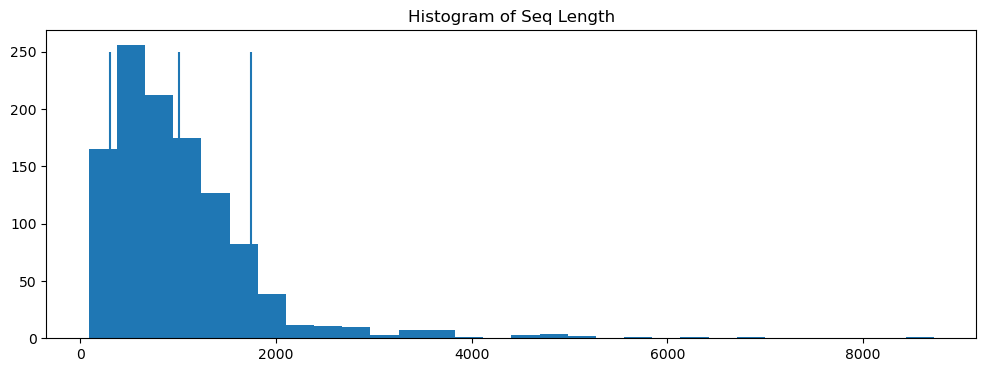

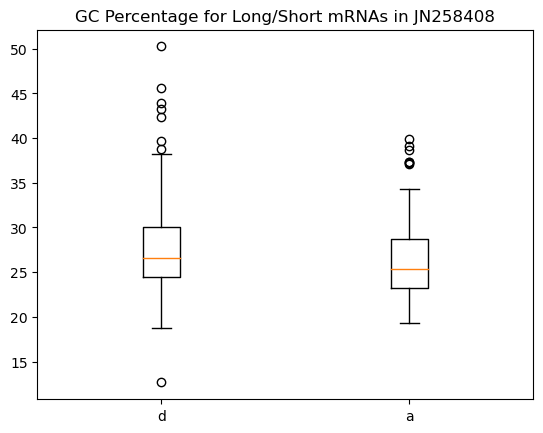



988 CDS regions detected in JF801956

Quantile boundaries & GC Content
10%: 326.1
Mean (GC%) in short seqs 29.900874129259808
Variance (GC%) in short seqs 38.69988239723407

90%: 1857.6000000000008
Mean (GC%) in long seqs 29.035643244748673
Variance (GC%) in long seqs 16.800222810478488

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.25187134476169265

Maximum CDS length: 8880
Minimum CDS length: 102
Mean CDS length: 1055.9423076923076


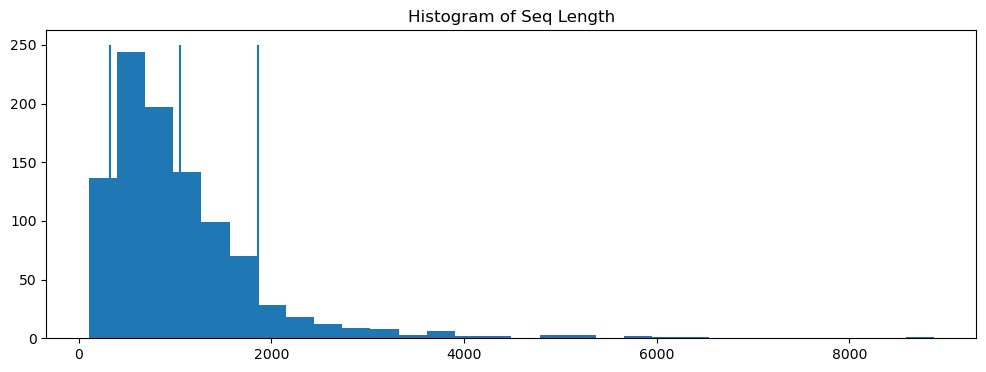

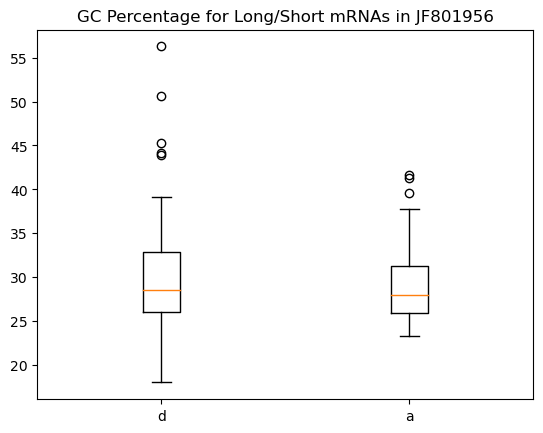



979 CDS regions detected in NC_014649

Quantile boundaries & GC Content
10%: 315.0
Mean (GC%) in short seqs 29.815679590401224
Variance (GC%) in short seqs 27.499757602988055

90%: 1899.6000000000001
Mean (GC%) in long seqs 29.238067278189117
Variance (GC%) in long seqs 16.985314779389437

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.39181890216386484

Maximum CDS length: 8880
Minimum CDS length: 78
Mean CDS length: 1073.0347293156283


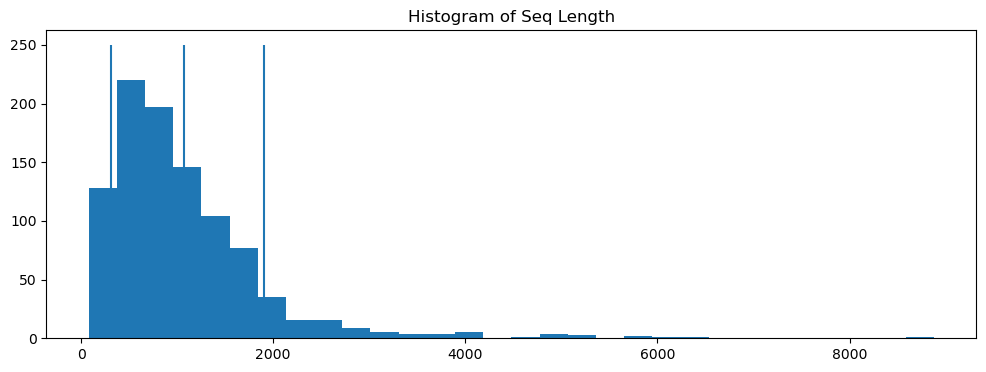

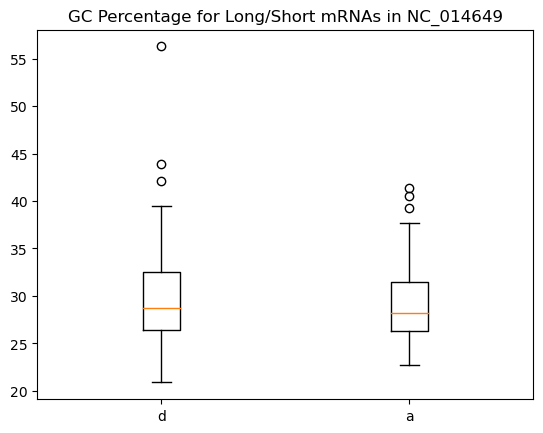



756 CDS regions detected in JN036606

Quantile boundaries & GC Content
10%: 429.0
Mean (GC%) in short seqs 28.659247012502085
Variance (GC%) in short seqs 23.151750968880382

90%: 1804.5
Mean (GC%) in long seqs 29.535297447068135
Variance (GC%) in long seqs 13.558245756253593

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.20694438237032825

Maximum CDS length: 5814
Minimum CDS length: 156
Mean CDS length: 1068.4722222222222


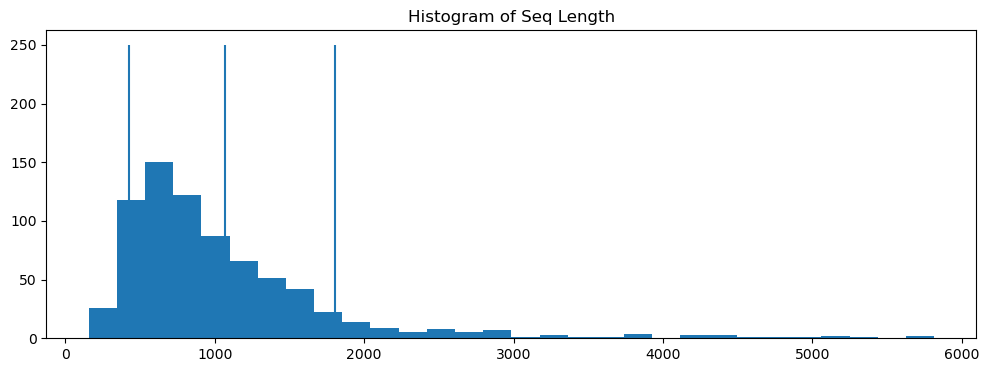

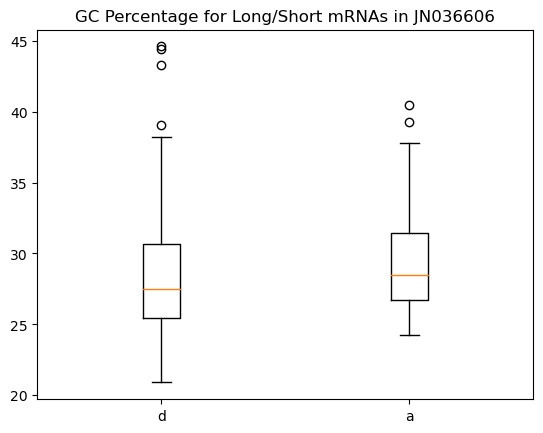



544 CDS regions detected in NC_014637

Quantile boundaries & GC Content
10%: 240.0
Mean (GC%) in short seqs 23.3245348939081
Variance (GC%) in short seqs 39.050911334246194

90%: 2167.2
Mean (GC%) in long seqs 24.627532210077668
Variance (GC%) in long seqs 29.872090083380773

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  0.24414891022716362

Maximum CDS length: 10014
Minimum CDS length: 144
Mean CDS length: 1023.0165441176471


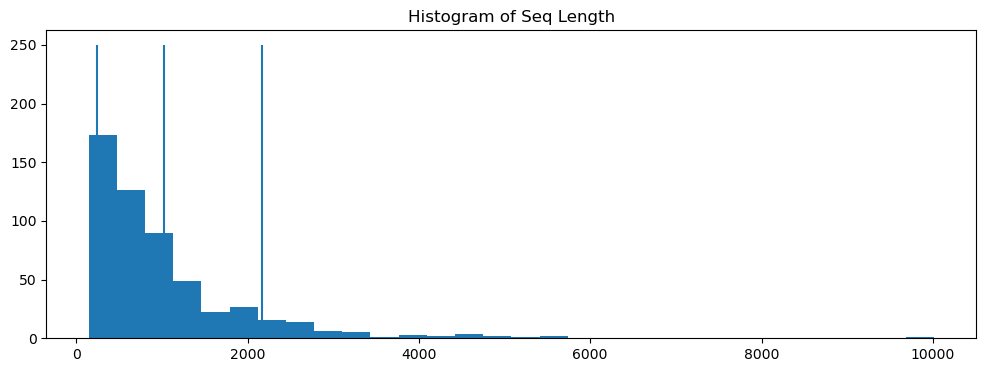

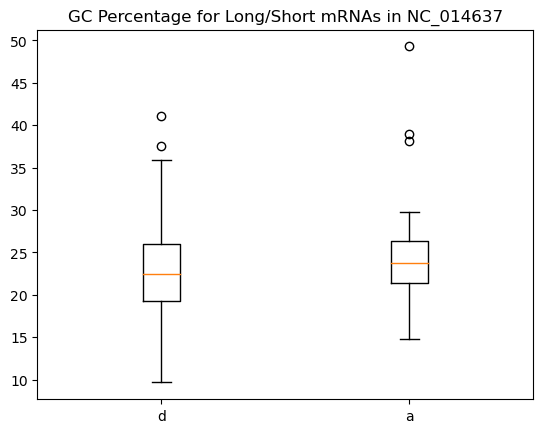



4315 CDS regions detected in U00096

Quantile boundaries & GC Content
10%: 273.0
Mean (GC%) in short seqs 45.11590461270157
Variance (GC%) in short seqs 53.989838767066836

90%: 1662.0
Mean (GC%) in long seqs 53.09063231699061
Variance (GC%) in long seqs 12.184119238148636

T test to determine if long & short GC% are drawn from the same distribution
Note: unequal variances
pvalue:  3.932201982369456e-72

Maximum CDS length: 7077
Minimum CDS length: 27
Mean CDS length: 932.9951332560835


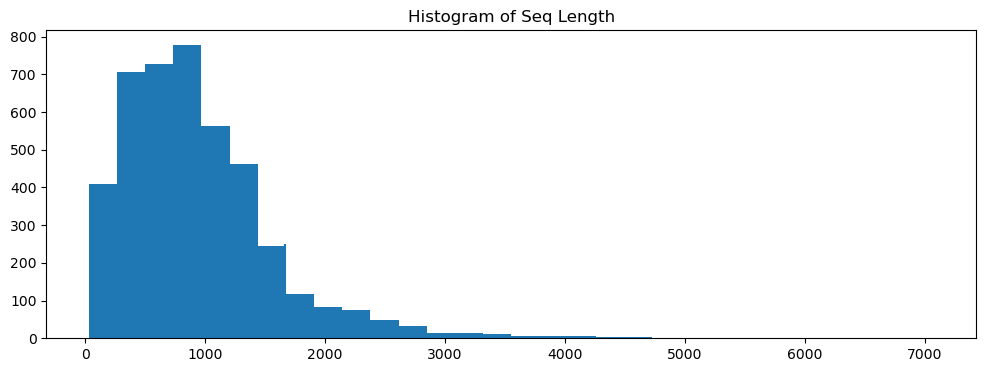

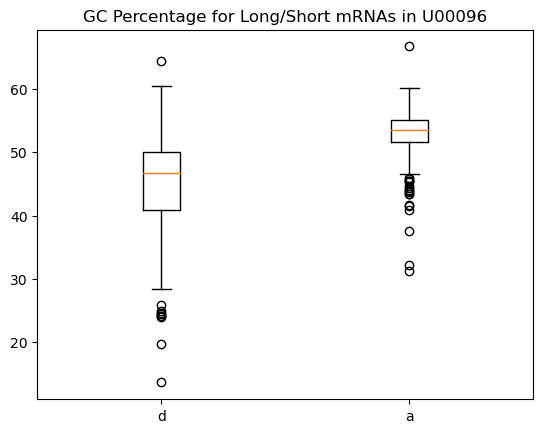

In [66]:
accessions = []
with open('genbank_accessions.txt','r') as in_file:
    for line in in_file:
        string = line.strip()
        accessions.append(string)

analyse_genbank_gc(accessions)

#Moment of truth

### Analysis:

All of the P-values except one are insignificant, with the most significant at 3.932201982369456e-72 for Accession U00096 (corresponding to *e.coli*) However, given the large number of CDS in the sample even this may be an optimistic confidence level. In short, based on the data seen above, there does not seem to be a correlation between GC percentage and length of sequence in the given Megavirii